# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [91]:
data=pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [93]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [94]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [95]:
data1[data1.duplicated()]

,RDS,ADMS,MKTS,State,Profit


In [96]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [97]:
data1.shape

(50, 5)

In [98]:
df = pd.DataFrame(data1)

In [99]:
data2=df.drop(['State'], axis=1)
data2

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [100]:
data2.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

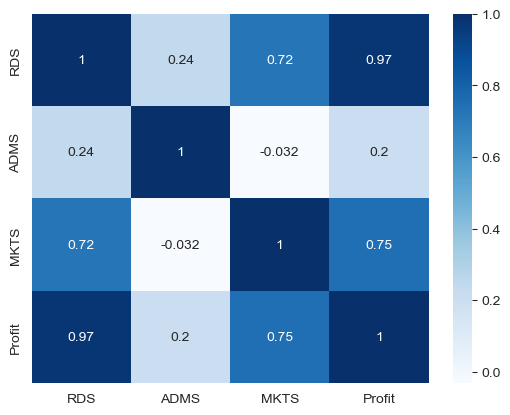

In [101]:
# Correlation Matrix

sns.heatmap(data2.corr(),annot=True,cmap=plt.cm.Blues)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


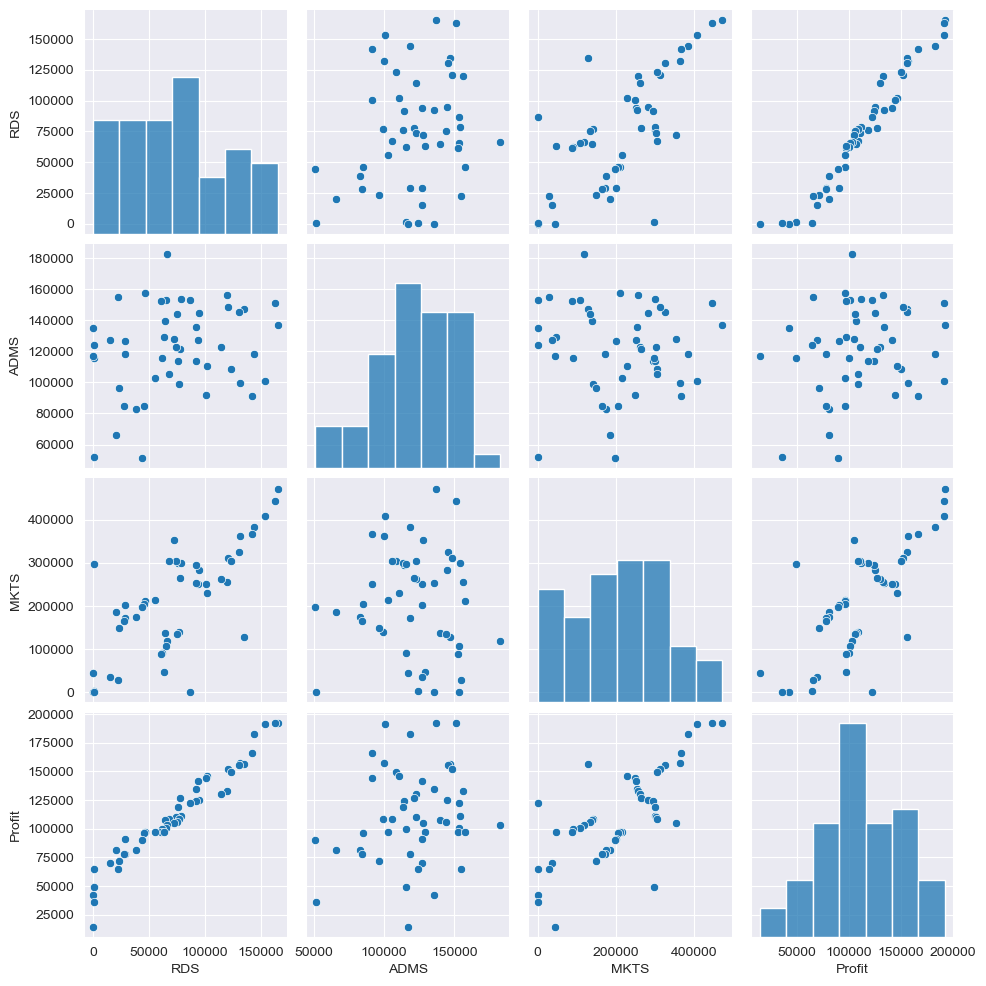

In [102]:
# Format the plot background and scatter plots for all the variables

sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Preparing a model

In [231]:
model1=smf.ols('Profit~RDS+ADMS+MKTS',data=data1).fit()

In [232]:
model1.rsquared

0.9507459940683246

In [233]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        03:01:25   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF and Checking for Multicollinearity

In [234]:
rsq_RDS = smf.ols('RDS~ADMS+MKTS',data=data1).fit().rsquared
vif_RDS= 1/(1-rsq_RDS) 

rsq_ADMS = smf.ols('ADMS~RDS+MKTS',data=data1).fit().rsquared
vif_ADMS = 1/(1-rsq_ADMS) 

rsq_MKTS = smf.ols('MKTS~RDS+ADMS',data=data1).fit().rsquared
vif_MKTS = 1/(1-rsq_MKTS) 


# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADMS','MKTS'],'VIF':[vif_RDS,vif_ADMS,vif_MKTS]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


# Treatment for Multicollinearity

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0.,
        0., 1., 0., 0., 4., 6., 2., 2., 4., 6., 3., 2., 1., 1., 2., 2., 4.,
        2., 1., 1., 0., 1., 1.]),
 array([-33533.7341113 , -32263.50500069, -30993.27589008, -29723.04677947,
        -28452.81766886, -27182.58855825, -25912.35944764, -24642.13033703,
        -23371.90122642, -22101.67211581, -20831.4430052 , -19561.21389459,
        -18290.98478398, -17020.75567337, -15750.52656276, -14480.29745215,
        -13210.06834154, -11939.83923093, -10669.61012032,  -9399.38100971,
         -8129.1518991 ,  -6858.92278849,  -5588.69367788,  -4318.46456727,
         -3048.23545666,  -1778.00634605,   -507.77723544,    762.45187517,
          2032.68098578,   3302.91009639,   4573.139207  ,   5843.36831761,
          7113.59742822,   8383.82653882,   9654.05564943,  10924.28476004,
         12194.51387065,  13464.74298126,  14734.97209187,  16005.20120248,
         17275.43031309]),
 <BarContainer object of 40

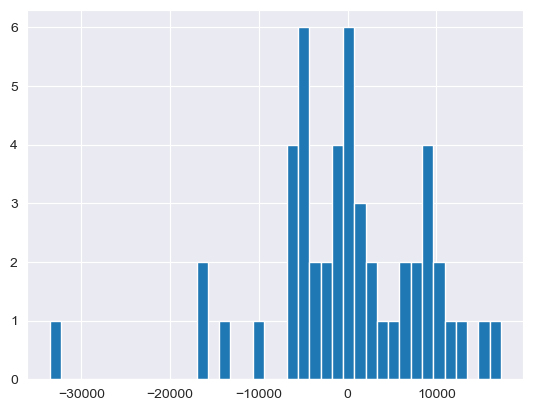

In [235]:
plt.hist(model1.resid,bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x17a76d4afb0>,
 'caps': [<matplotlib.lines.Line2D at 0x17a76d4b4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a76d4ad10>],
 'medians': [<matplotlib.lines.Line2D at 0x17a76d4ba30>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a76d4bcd0>],
 'means': []}

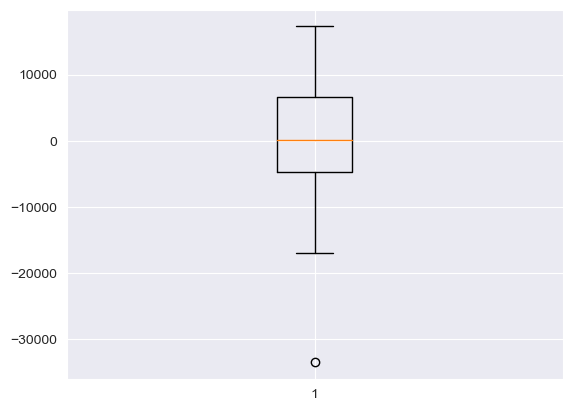

In [236]:
plt.boxplot(model1.resid)

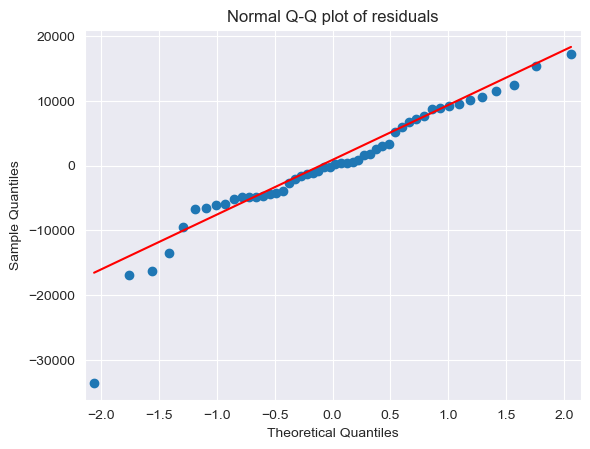

In [237]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [238]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

#minmax scaler
#robust scaler

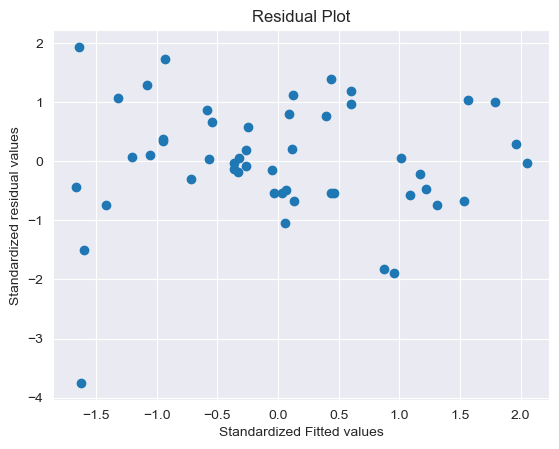

In [239]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Error vs Feature ( should be independent)

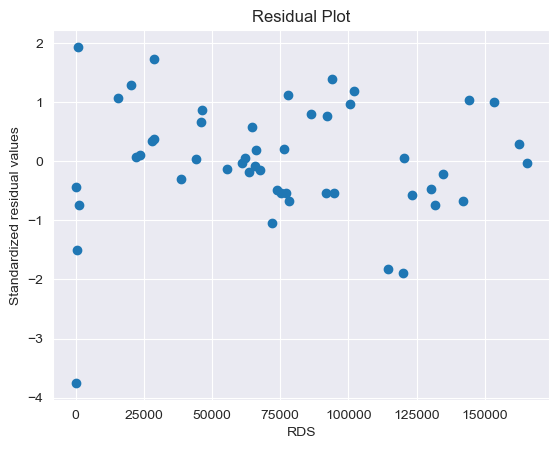

In [240]:
plt.scatter(data1["RDS"],
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('RDS')
plt.ylabel('Standardized residual values')
plt.show()

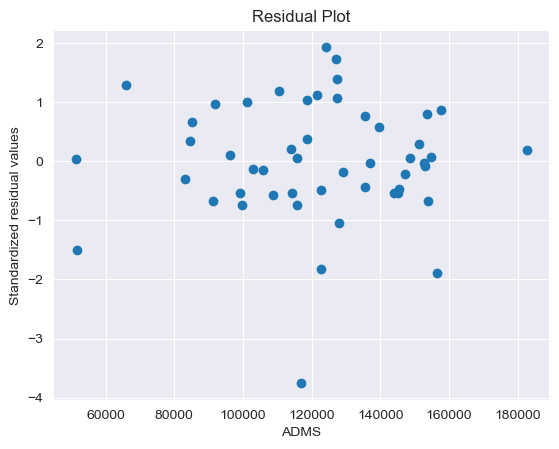

In [241]:
plt.scatter(data1["ADMS"],
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('ADMS')
plt.ylabel('Standardized residual values')
plt.show()

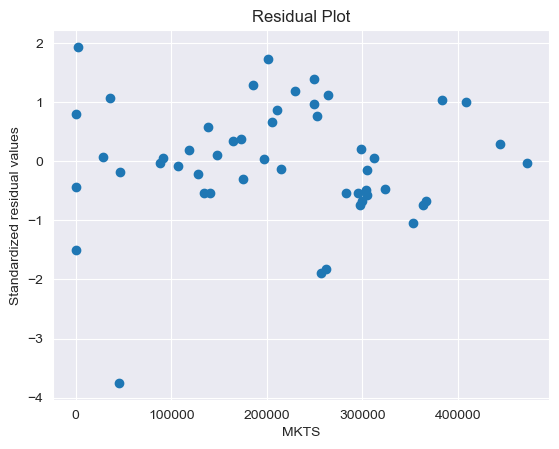

In [242]:
plt.scatter(data1["MKTS"],
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('MKTS')
plt.ylabel('Standardized residual values')
plt.show()

# Model Deletion Diagnostics

Detecting Influencers/Outliers

# Cook’s Distance

In [243]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

In [244]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [245]:
K=5
N=50
(3*K)/N

0.3

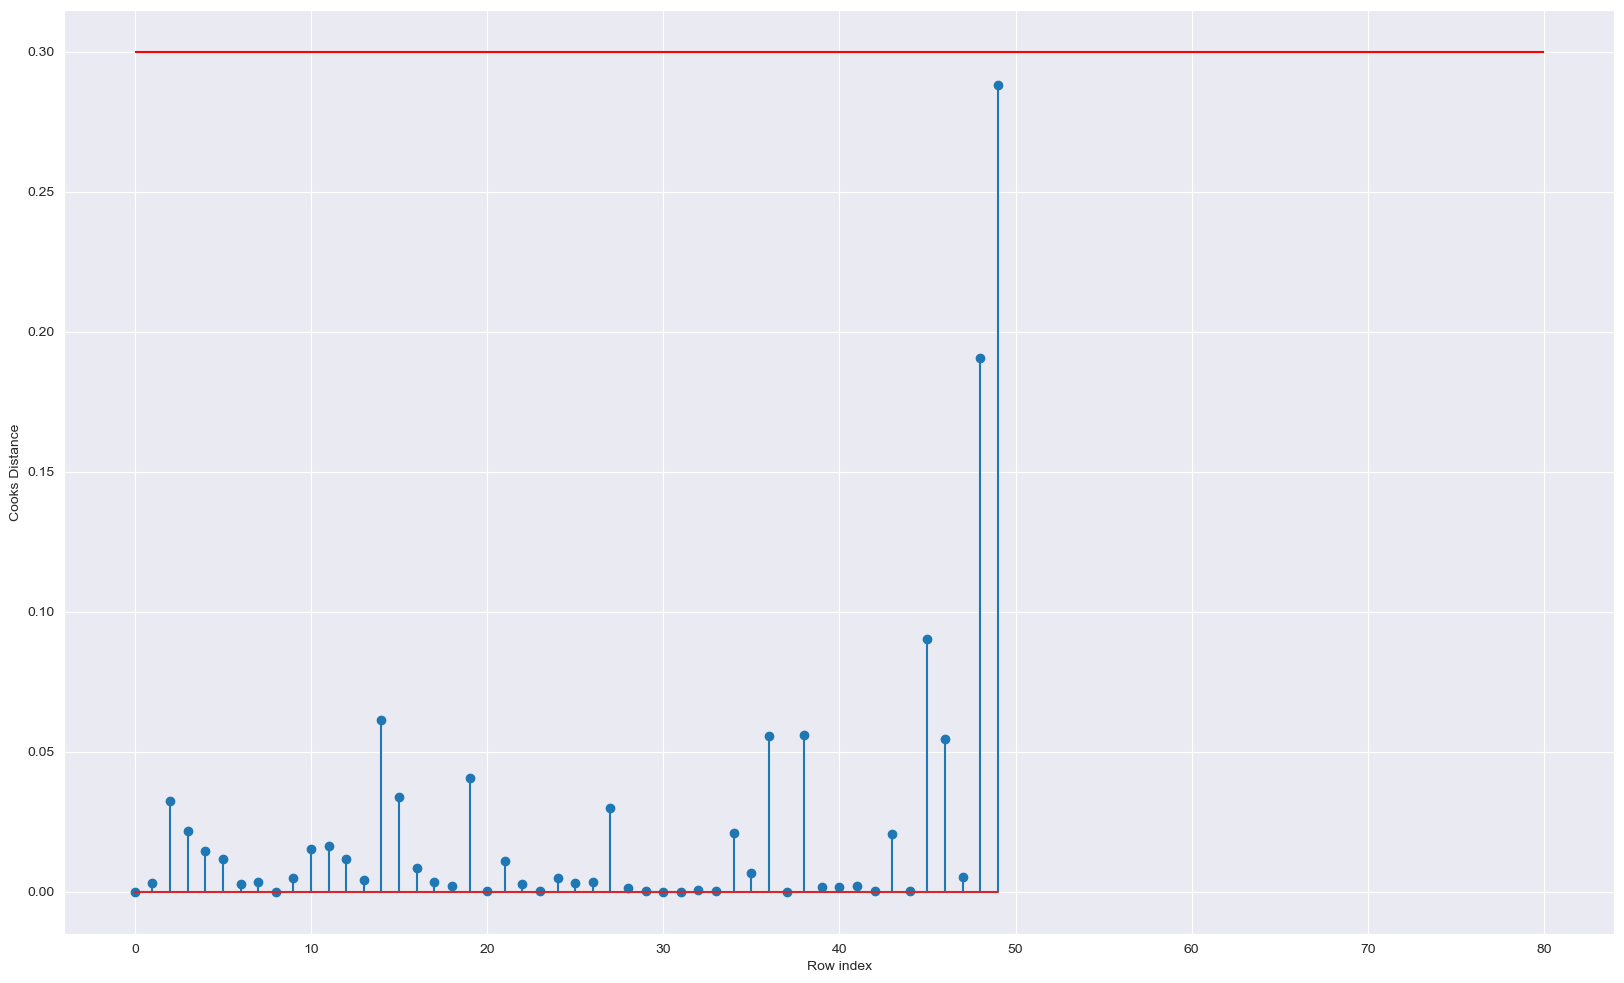

In [246]:
#Plot the influencers values using stem plot

fig = plt.figure(figsize=(20,12))
plt.stem(np.arange(len(data1)), np.round(c, 5))
plt.hlines(y=0.3,xmin=0,xmax=80,color="red")
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

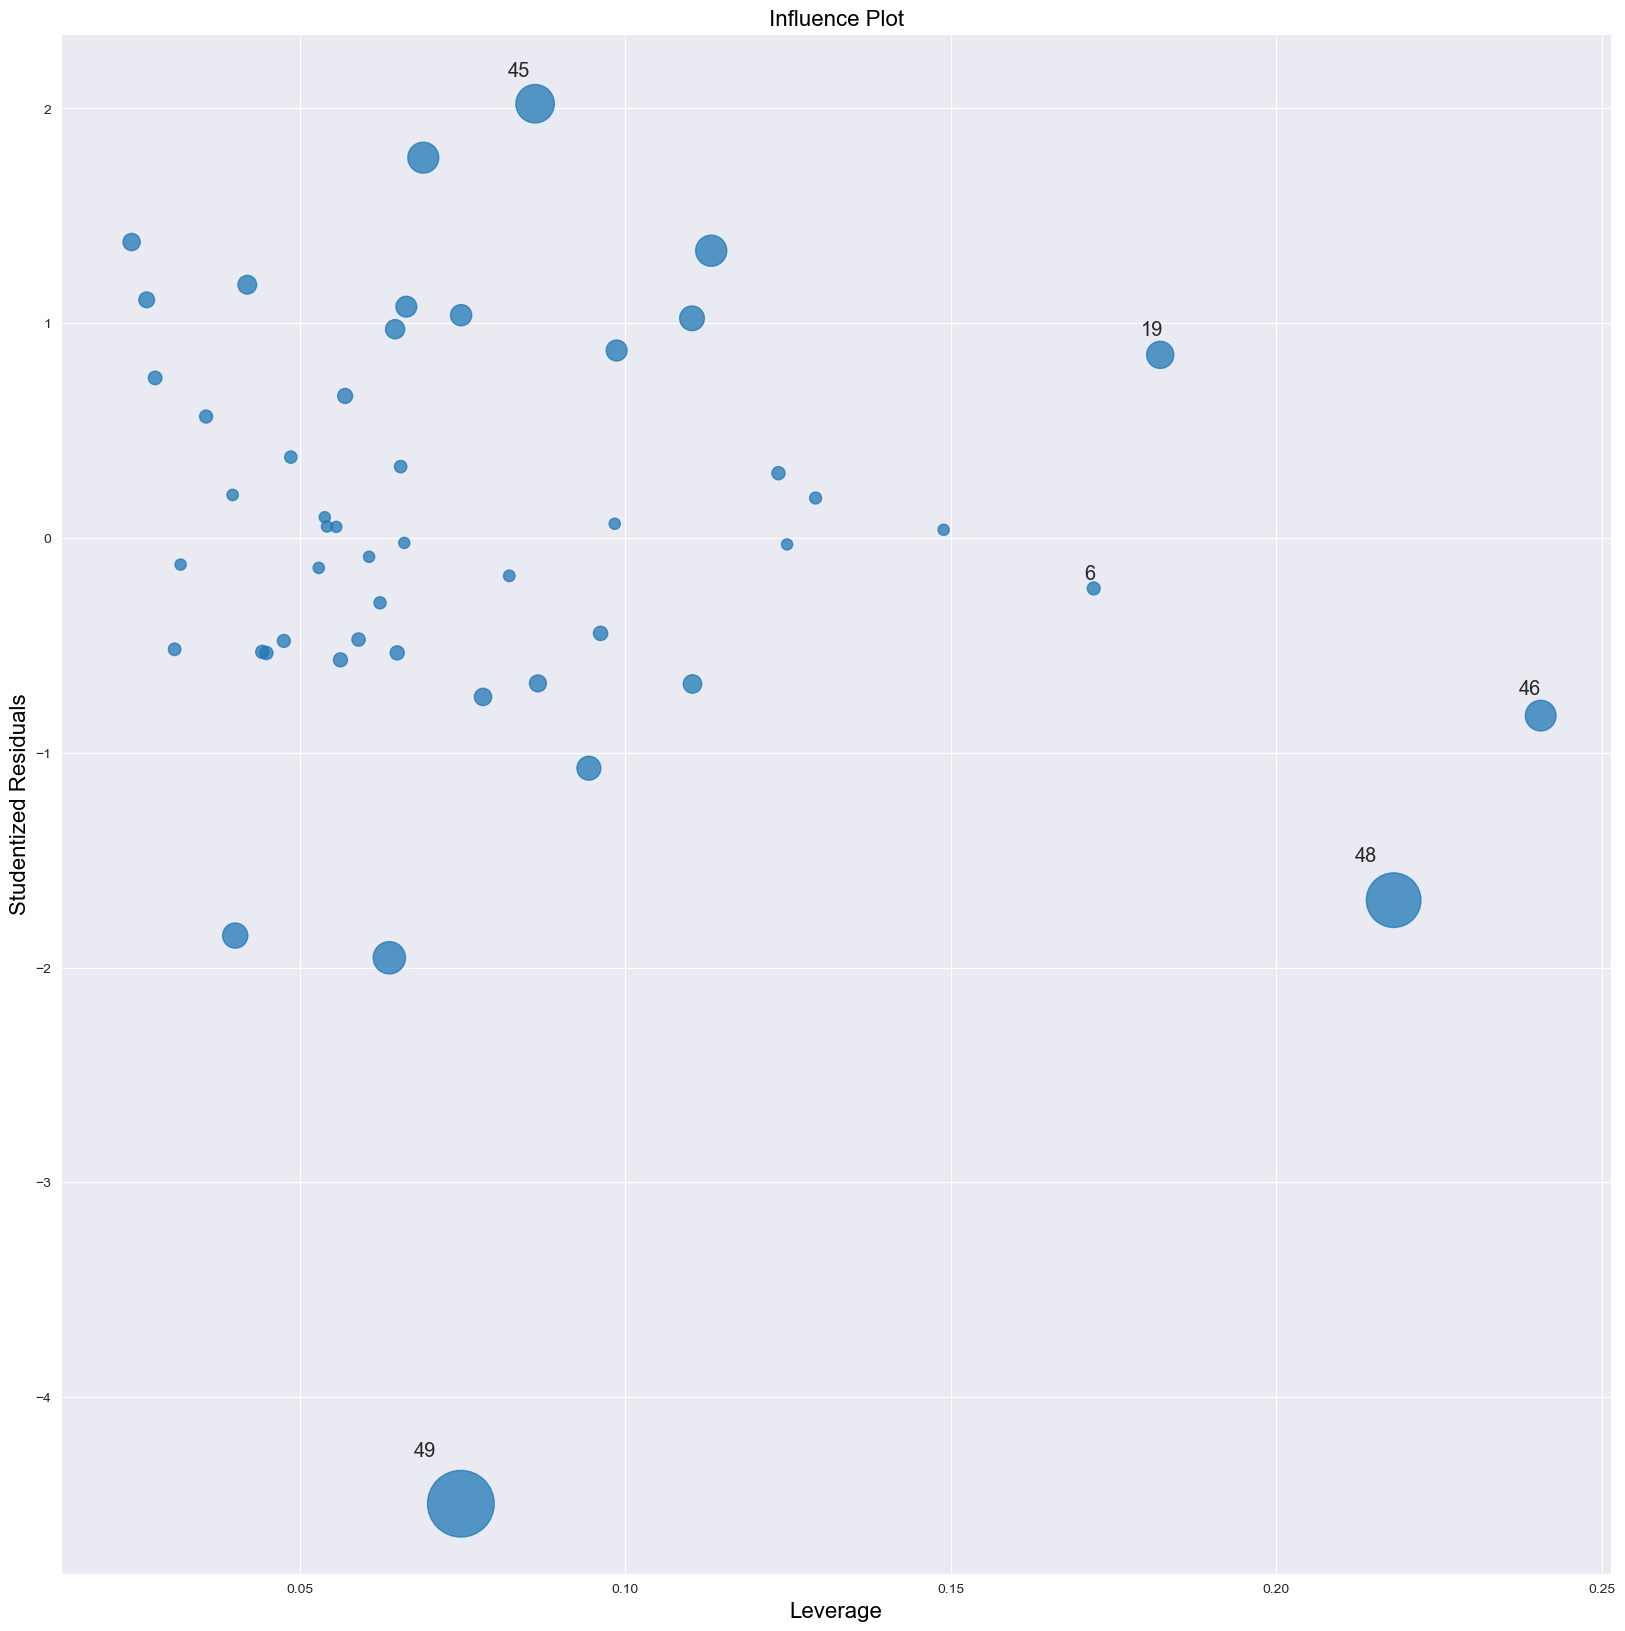

In [247]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model1,ax = ax)

In [248]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432656)

# Improving the model

In [249]:
#Discard the data points which are influencers and reasign the row number (reset_index())

new_data=data1.drop(data1.index[[49]],axis=0).reset_index()

In [250]:
#Drop the original index

new_data=new_data.drop(['index'],axis=1)
new_data

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [251]:
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=new_data).fit()

In [252]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols('Profit~RDS+ADMS+MKTS',data=new_data).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        new_data=new_data.drop(new_data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        new_data
    else:
        final_model=smf.ols('Profit~RDS+ADMS+MKTS',data=new_data).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.98771919355472
Thus model accuracy is improved 

In [253]:
(final_model.rsquared,final_model.aic)

(0.9882757054424702, 515.740026329004)

In [254]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     646.2
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           2.45e-22
Time:                        03:04:01   Log-Likelihood:                -253.87
No. Observations:                  27   AIC:                             515.7
Df Residuals:                      23   BIC:                             520.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.739e+04   3403.787     13.922      0.000    4.03e+04    5.44e+04
RDS            0.6937      0.030     23.347      0.000       0.632       0.755
ADMS           0.0256      0.024      1.064      0.298      -0.024       0.075
MKTS           0.0472      0.011      4.335      0.000       0.025       0.070
==============================================================================
Omnibus:                        3.469   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                2.329
Skew:                           0.713   Prob(JB):                        0.312
Kurtosis:                       3.190   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [255]:
new_data

,RDS,ADMS,MKTS,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


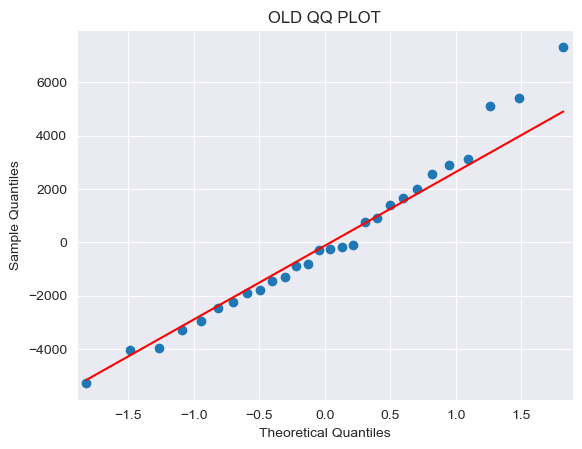

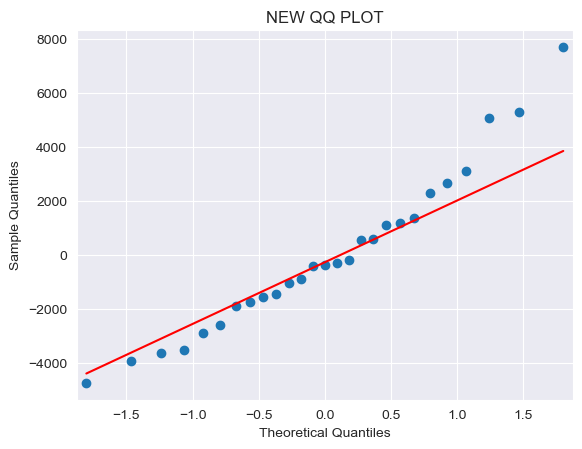

In [256]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("OLD QQ PLOT")
plt.show()
import statsmodels.api as sm
qqplot=sm.qqplot(final_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("NEW QQ PLOT")
plt.show()

Text(0.5, 1.0, 'NEW HIST')

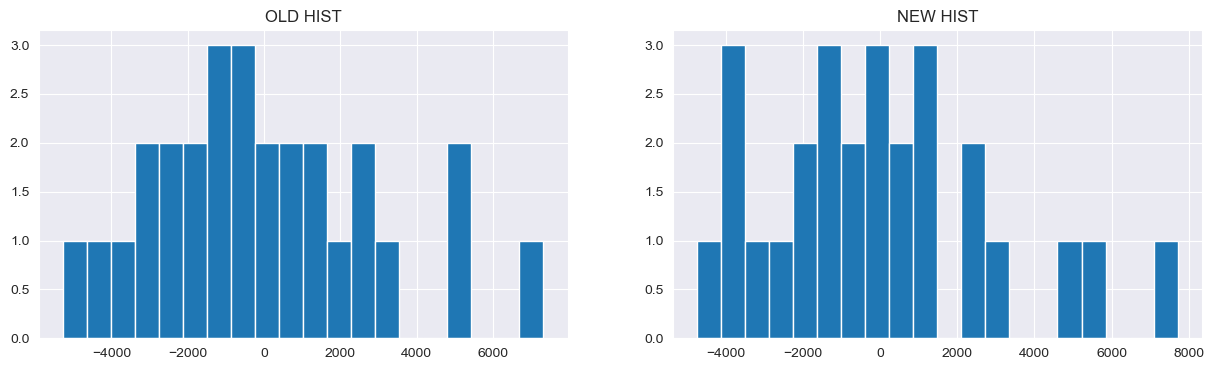

In [257]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

plt.hist(model.resid,bins=20)
plt.title("OLD HIST")


plt.subplot(1,2,2)

plt.hist(final_model.resid,bins=20)
plt.title("NEW HIST")

In [258]:
new_data1=pd.DataFrame({'RDS':77000,"ADMS":97000,"MKTS":140000},index=[0])
new_data1

,RDS,ADMS,MKTS
0,77000,97000,140000


In [259]:
final_model.predict(new_data1)

0    109893.781032
dtype: float64

In [260]:
pred_y=final_model.predict(new_data)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [264]:
final_data={'Prep_Models':['Model1','Final_Model'],'Rsquared':[model1.rsquared,final_model.rsquared]}
table=pd.DataFrame(final_data)
table

,Prep_Models,Rsquared
0,Model1,0.950746
1,Final_Model,0.988276
